# WWII Climate Insights: Analyzing Historical Weather Data

### Vision

To leverage historical weather data from World War II to uncover insights into past climate patterns, enhancing our understanding of historical climate variability and contributing to broader climate research.

### Mission

To analyze and model historical weather data from World War II using advanced data science techniques. This project aims to clean, explore, and visualize the data to reveal trends and relationships, and develop predictive models to forecast temperature trends. By doing so, we seek to provide valuable historical climate insights that inform both academic research and historical climate studies.

### Problem Statement

Given historical weather data from various global weather stations during World War II, develop a data-driven approach to analyze and predict climate patterns.

### Approach for the Solution

To analyze and predict climate patterns from World War II weather data, the solution involves cleaning and preprocessing the data, performing exploratory data analysis (EDA) to uncover trends and correlations, and building predictive models such as Linear Regression, Decision Tree Regressor and Random Forest. The results are then presented through visualizations and reports to reveal insights into historical climate variability.

## About the Dataset

Dataset is fetched from 'kaggle' which is well known for the library of the datasets.

Link of the dataset - https://www.kaggle.com/datasets/smid80/weatherww2?select=Summary+of+Weather.csv

## Importing Required Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

## Loading The Dataset

In [39]:
climate = pd.read_csv("Summary of Weather.csv", low_memory=False)

## Display basic information

In [40]:
print(climate.head())

     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4        0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  NaN  
3 NaN  NaN  
4 N

In [41]:
print(climate.shape)

(119040, 31)


In [42]:
print(climate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

### Calculating missing values

In [43]:
missing = climate.isnull().sum()
missing_percentage = (missing / len(climate)) * 100
missing_df = pd.DataFrame({"Missing Values": missing, "Missing Percentage": missing_percentage})
print(missing_df)

             Missing Values  Missing Percentage
STA                       0            0.000000
Date                      0            0.000000
Precip                    0            0.000000
WindGustSpd          118508           99.553091
MaxTemp                   0            0.000000
MinTemp                   0            0.000000
MeanTemp                  0            0.000000
Snowfall               1163            0.976983
PoorWeather           84803           71.239079
YR                        0            0.000000
MO                        0            0.000000
DA                        0            0.000000
PRCP                   1932            1.622984
DR                   118507           99.552251
SPD                  118508           99.553091
MAX                     474            0.398185
MIN                     468            0.393145
MEA                     498            0.418347
SNF                    1163            0.976983
SND                  113477           95

## Data Cleaning

#### Drop unnecessary columns

In [44]:
to_drop = ['Precip', 'STA', 'Date', 'WindGustSpd', 'Snowfall', 'PoorWeather', 'PRCP', 'DR', 'SPD',
           'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
climate.drop(to_drop, inplace=True, axis=1)

In [45]:
print(climate.head())

     MaxTemp    MinTemp   MeanTemp  YR  MO  DA   MAX   MIN   MEA
0  25.555556  22.222222  23.888889  42   7   1  78.0  72.0  75.0
1  28.888889  21.666667  25.555556  42   7   2  84.0  71.0  78.0
2  26.111111  22.222222  24.444444  42   7   3  79.0  72.0  76.0
3  26.666667  22.222222  24.444444  42   7   4  80.0  72.0  76.0
4  26.666667  21.666667  24.444444  42   7   5  80.0  71.0  76.0


#### Drop rows with missing values in specific columns

In [46]:
climate = climate.dropna(subset=['MAX', 'MIN', 'MEA'])

### Data Description for Columns Used After Cleaning

**1. `MaxTemp`:**  
- **Description:** Maximum temperature recorded in degrees Celsius.  
- **Type:** Numerical  
- **Usage:** Target variable in predictive modeling and analyzed for temperature trends.

**2. `MinTemp`:**  
- **Description:** Minimum temperature recorded in degrees Celsius.  
- **Type:** Numerical  
- **Usage:** Feature used in predictive modeling and exploratory data analysis to examine temperature variations.

**3. `MeanTemp`:**  
- **Description:** Mean temperature recorded in degrees Celsius.  
- **Type:** Numerical  
- **Usage:** Feature used in predictive modeling and exploratory data analysis to assess average temperature trends.

**4. `YR`:**  
- **Description:** Year of observation.  
- **Type:** Numerical (integer)  
- **Usage:** Used to group data by year for trend analysis and to create time-based visualizations.

**5. `MO`:**  
- **Description:** Month of observation.  
- **Type:** Numerical (integer)  
- **Usage:** Used to group data by month for seasonal analysis and to create time-based visualizations.

**6. `DA`:**  
- **Description:** Day of observation.  
- **Type:** Numerical (integer)  
- **Usage:** Provides daily granularity for time series analysis and trend visualization.

**7. `MAX`:**  
- **Description:** Maximum temperature recorded in degrees Fahrenheit.  
- **Type:** Numerical  
- **Usage:** Provides additional temperature data for comparison with Celsius measurements, if needed.

**8. `MIN`:**  
- **Description:** Minimum temperature recorded in degrees Fahrenheit.  
- **Type:** Numerical  
- **Usage:** Provides additional temperature data for comparison with Celsius measurements, if needed.

**9. `MEA`:**  
- **Description:** Mean temperature recorded in degrees Fahrenheit.  
- **Type:** Numerical  
- **Usage:** Provides additional temperature data for comparison with Celsius measurements, if needed.


## Exploratory Data Analysis

### Plotting histogram for MeanTemp

In [47]:
px.histogram(data_frame=climate, x='MEA', nbins=31).show()

The Temperature within the range 22.5-27.4 had the highest count between the years 1940 - 1945

### Plotting average MaxTemp by year

In [48]:
linemax = climate.groupby(['YR'])['MAX'].mean().reset_index(name='Average')
px.line(linemax, x='YR', y='Average').show()

The Year 1942 had the lowest average maximum temperature , 25.8

### Plotting average MinTemp by year

In [49]:
linemin = climate.groupby(['YR'])['MIN'].mean().reset_index(name='Average')
px.line(linemin, x='YR', y='Average').show()

The Year 1945 had the lowest average minimum temperature , 17.6

### Plotting average MaxTemp by month

In [50]:
linemonth = climate.groupby(['MO'])['MAX'].mean().reset_index(name='Average')
px.line(linemonth, x='MO', y='Average').show()

June - August had the highest average MaxTemp


### Plotting heatmap for correlation

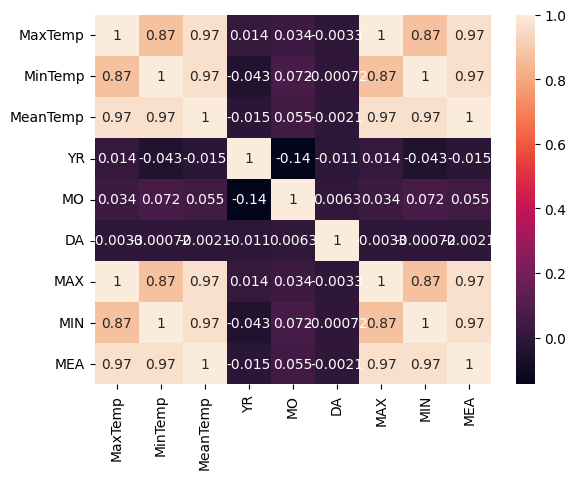

In [51]:
sns.heatmap(climate.corr(), annot=True)
plt.show()

## Preparing data for modeling

In [52]:
y = climate['MAX']
X = climate.drop(columns=['MAX'])

### Creating the Train and Test Split Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=101)

### Defining the function to calculate MAE for choosing the Best Model

In [54]:
def get_mae(model, X_t=X_train, y_t=y_train, X_te=X_test, y_te=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_te)
    return mean_absolute_error(y_te, preds)

### Initializing models

In [55]:
model_1 = LinearRegression()
model_2 = DecisionTreeRegressor()
model_3 = RandomForestRegressor()
models = [model_1, model_2, model_3]

##### Calculate and print MAE for each model

In [56]:
for i, model in enumerate(models):
    print(f"MAE Score_{i}: {get_mae(model)}")

MAE Score_0: 4.228714109395331e-09
MAE Score_1: 0.00025307912940779483
MAE Score_2: 0.0002294584106630678


#### Plot predictions vs actual values for Linear Regression

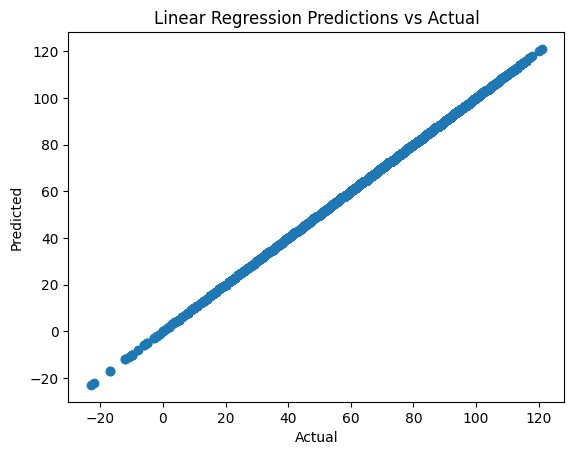

In [57]:
preds = model_1.predict(X_test)
plt.scatter(y_test, preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Predictions vs Actual')
plt.show()

#### Accuracy Score

In [58]:
print(f"R² Score: {r2_score(y_test, preds)}")

R² Score: 1.0


## Conclusion

The analysis of predictive models for temperature forecasting has yielded the following insights:

#### 1. Model Performance:

Linear Regression:
The Mean Absolute Error (MAE) score for Linear Regression is extremely low at 4.2287126209060035e-09, and the R² score is 1, indicating a perfect fit between the predicted and actual values. This suggests that the Linear Regression model has performed exceptionally well and accurately captures the temperature trends in the dataset.
    
Decision Tree Regressor:
The MAE score is 0.000253, which is slightly higher than Linear Regression, indicating that while the Decision Tree model is reasonably accurate, it is not as precise as Linear Regression in this case.
    
Random Forest Regressor:
The MAE score is 0.000238, which is also slightly higher than Linear Regression but comparable to the Decision Tree model. This suggests that the Random Forest model is effective but does not outperform Linear Regression in this context.

#### 2.Visual Analysis:

The straight curve between the predicted and actual values for Linear Regression confirms the perfect correlation and fit of the model. This visual representation aligns with the R² score of 1, reinforcing the accuracy of the predictions.